# ML UVA Project: Predicting Opioid Overdoses in VA

In [26]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# from google.colab import drive
# drive.mount('/content/gdrive')

In [27]:
# to make this notebook's output stable across runs
np.random.seed(42)

# file_path_google = "/content/gdrive/My Drive/ML_Project/clean_opioid.csv"
file_path_local = "clean_opioid.csv"


df = pd.read_csv(file_path_local)
print(df.head())
print(df.head())
print(df.info())
print(df.describe())

    fips  Diagnosed HIV  ED Heroin Overdose  ED Opioid Overdose  EMS Narcan  \
0  51001            3.0                 6.1                60.7        48.6   
1  51003            2.8                 8.4                84.2        15.9   
2  51005            6.4                 0.0               218.0        12.8   
3  51007            7.7                 0.0                54.2        23.2   
4  51009            6.3                 0.0                79.0        19.0   

   Fatal Fentanyl and/or Heroin Overdose  Fatal Prescription Opioid Overdose  \
0                                   12.1                                12.1   
1                                    0.9                                 0.9   
2                                    6.4                                12.8   
3                                    7.7                                 0.0   
4                                    3.2                                 6.3   

   Reported Hepatitis C (18-30 year olds) p_

                                            fips  Diagnosed HIV  \
fips                                    1.000000       0.224897   
Diagnosed HIV                           0.224897       1.000000   
ED Heroin Overdose                      0.209240       0.111642   
ED Opioid Overdose                      0.136897       0.049938   
EMS Narcan                              0.478540       0.186004   
Fatal Fentanyl and/or Heroin Overdose   0.239031       0.262313   
Fatal Prescription Opioid Overdose      0.042518      -0.026189   
Reported Hepatitis C (18-30 year olds) -0.078049       0.031140   
Average Household size                 -0.047172       0.031753   
High School graduate or higher          0.133456      -0.111182   
Veterans                               -0.028071       0.122025   
With Disability                        -0.131097      -0.074326   
Foreign Born                            0.283065       0.116022   
Language spoken at home - English      -0.305244      -0.11943

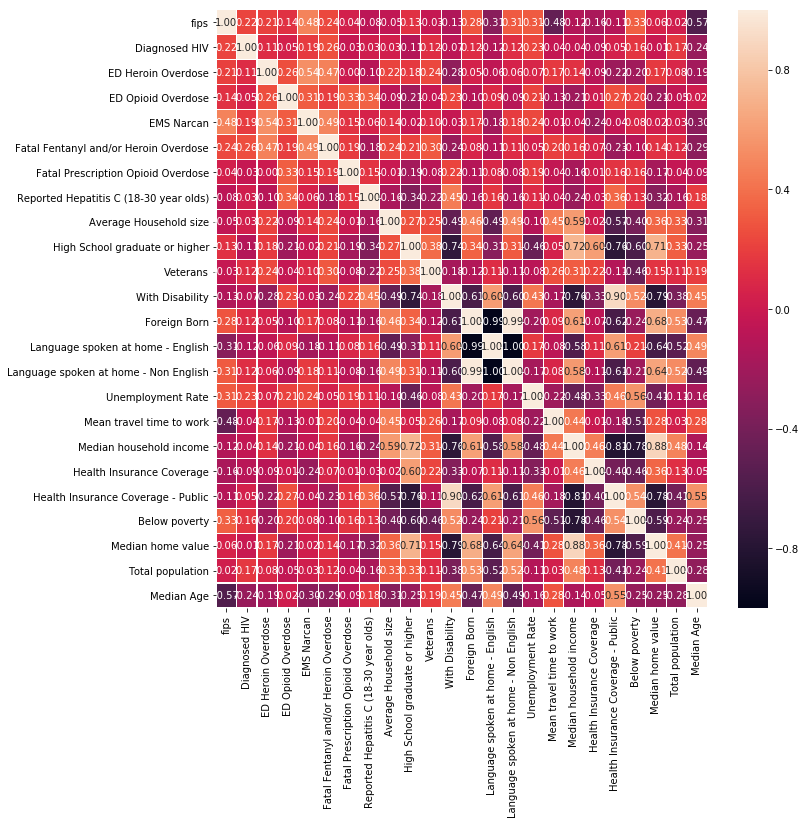

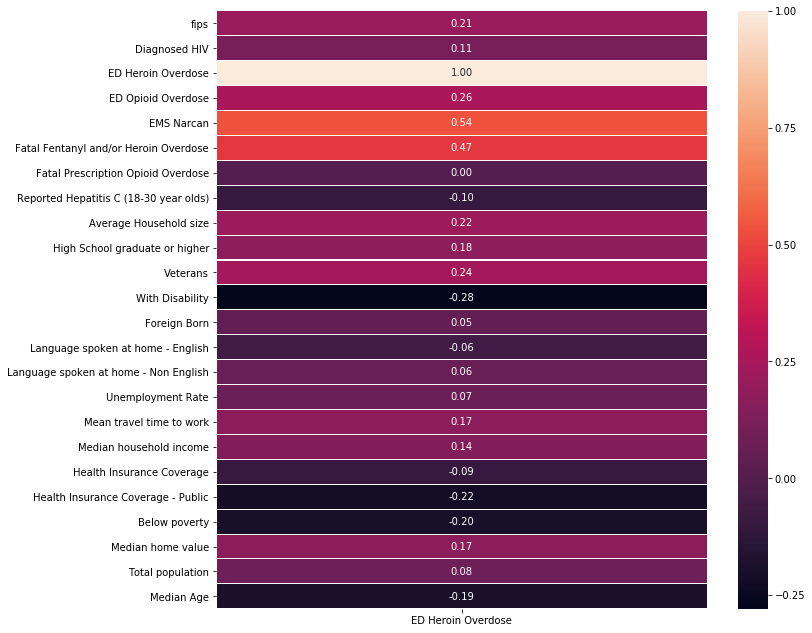

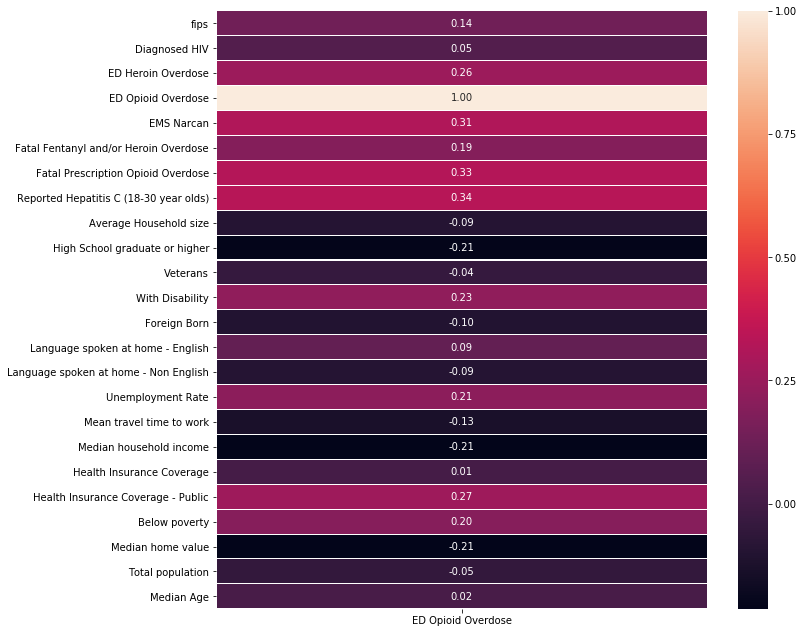

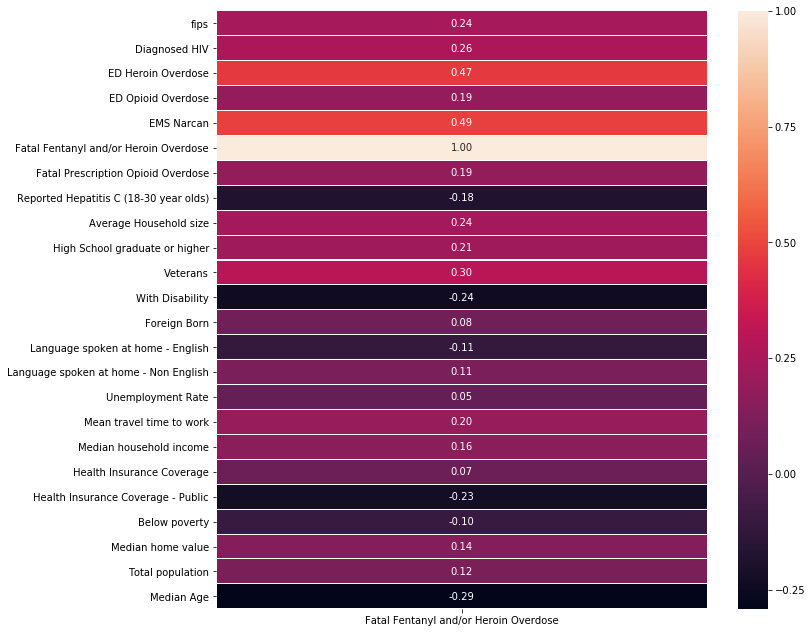

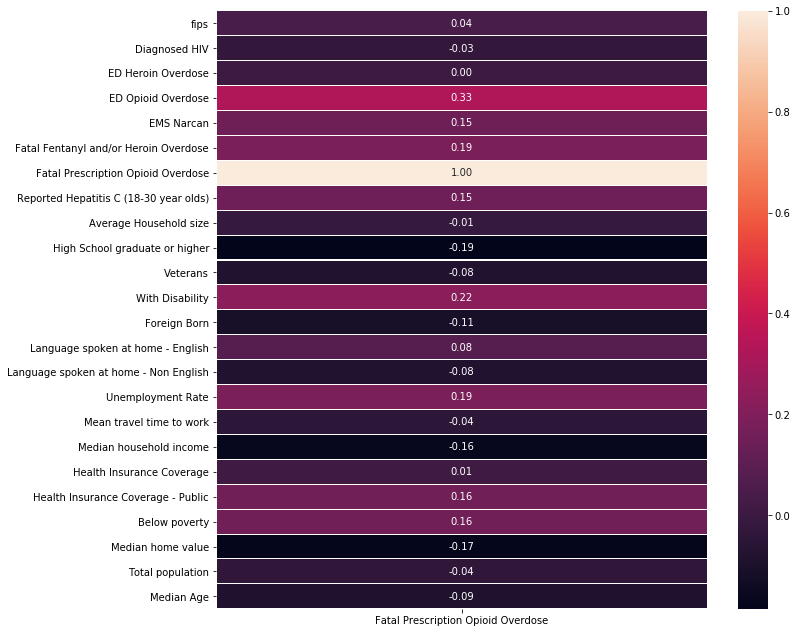

In [28]:
print(df.corr())
# pd.plotting.scatter_matrix(df, figsize=(12, 12), diagonal="kde")

# plot corr graphs
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()

# plot corr ed heroin
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df.corr()["ED Heroin Overdose"].to_frame(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()

# plot corr ed opioid
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df.corr()["ED Opioid Overdose"].to_frame(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()

# plot corr fatal heroin
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df.corr()["Fatal Fentanyl and/or Heroin Overdose"].to_frame(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()

# plot corr fatal rx opioid 
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df.corr()["Fatal Prescription Opioid Overdose"].to_frame(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()


In [29]:
print("Before NA removed:", df.shape)
df = df.dropna()
print("After NA removed:", df.shape)

print("NAs:", df.isna().sum())

x_data, y_data = df.drop(["ED Opioid Overdose", "p_rate", "locality_name"], axis=1), df["ED Opioid Overdose"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

Before NA removed: (134, 26)
After NA removed: (133, 26)
NAs: fips                                      0
Diagnosed HIV                             0
ED Heroin Overdose                        0
ED Opioid Overdose                        0
EMS Narcan                                0
Fatal Fentanyl and/or Heroin Overdose     0
Fatal Prescription Opioid Overdose        0
Reported Hepatitis C (18-30 year olds)    0
p_rate                                    0
locality_name                             0
Average Household size                    0
High School graduate or higher            0
Veterans                                  0
With Disability                           0
Foreign Born                              0
Language spoken at home - English         0
Language spoken at home - Non English     0
Unemployment Rate                         0
Mean travel time to work                  0
Median household income                   0
Health Insurance Coverage                 0
Health Insuran

In [30]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

RF = RandomForestRegressor(random_state=42)
RF.fit(x_train, y_train)
pred = RF.predict(x_test)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

SGD = SGDRegressor(learning_rate='optimal',max_iter=3000, tol=.0000003, early_stopping=False, eta0=.0002, loss="squared_epsilon_insensitive")
SGD.fit(x_train, y_train)
pred = SGD.predict(x_test)
print("SDG RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

lin_regress = LinearRegression()
lin_regress.fit(x_train, y_train)
pred = lin_regress.predict(x_test)
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

# TODO: Add polynomial regression

Random Forest RMSE: 80.6670841127858
SDG RMSE: 1.5183609280091016e+23
Linear Regression RMSE: 85.44760310182177


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


##### Note
It looks like SGD way over-fit, while linear and random forest were predicting more regularly. 
Next, it makes sense to do a few different things.

1. Tune Random Forest and Linear Regression.
2. Regularize SGD.
3. Evaluate how stable the models are

In [31]:
print(RF.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [32]:
###
# Code in the next 3 chunks from: 
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# Customized by: Rohit Musti
###

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [24]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 4)
# Fit the random search model
rf_random.fit(x_train, y_train)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   11.6s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   50.5s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  1.6min finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [25]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print("Model Performance")
    print("Average Error:", np.mean(errors))
    print("Accuracy:", accuracy)
    print()
    return accuracy

base_accuracy = evaluate(RF, x_test, y_test)
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)



print("Improvement of", (100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 58.665185185185194
Accuracy: -inf

Model Performance
Average Error: 60.65650425408473
Accuracy: -inf

Improvement of nan


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
